# CS231n Winter 2016: Lecture 2
## Topics: Data-driven approach, kNN, Linear Classification 1

video:
https://www.youtube.com/watch?v=8inugqHkfvE

In [1]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/8inugqHkfvE?rel=0&amp;controls=1&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')

## Preconditions
Used Data sets: **CIFAR-10**
- 10 labels
- 50,000 training images (32x32)
- 10,000 test images
- keras has it (`from keras.datasets import cifar10`)
- https://github.com/tensorflow/models/tree/master/tutorials/image/cifar10 or https://github.com/Hvass-Labs/TensorFlow-Tutorials/blob/master/cifar10.py - fetch for tensorflow

In [2]:
%matplotlib inline

from keras.datasets import cifar10
import matplotlib
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

cifar10_categories = [
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck',
]

Using TensorFlow backend.
/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [3]:
# util functions
def grid_of_images(cols, rows, image_callback, grid_width=8):
    """
    Show images in a grid
    """
    plt.figure(figsize=(grid_width, grid_width / cols * rows))
    gs = gridspec.GridSpec(rows, cols)

    for row_idx in range(rows):
        for col_idx in range(cols):
            plt.subplot(gs[row_idx, col_idx])
            plt.axis('off')
            image, title = image_callback(row_idx, col_idx)
            plt.imshow(image, interpolation='none')
            if title is not None:
                plt.title(title)
    plt.tight_layout()

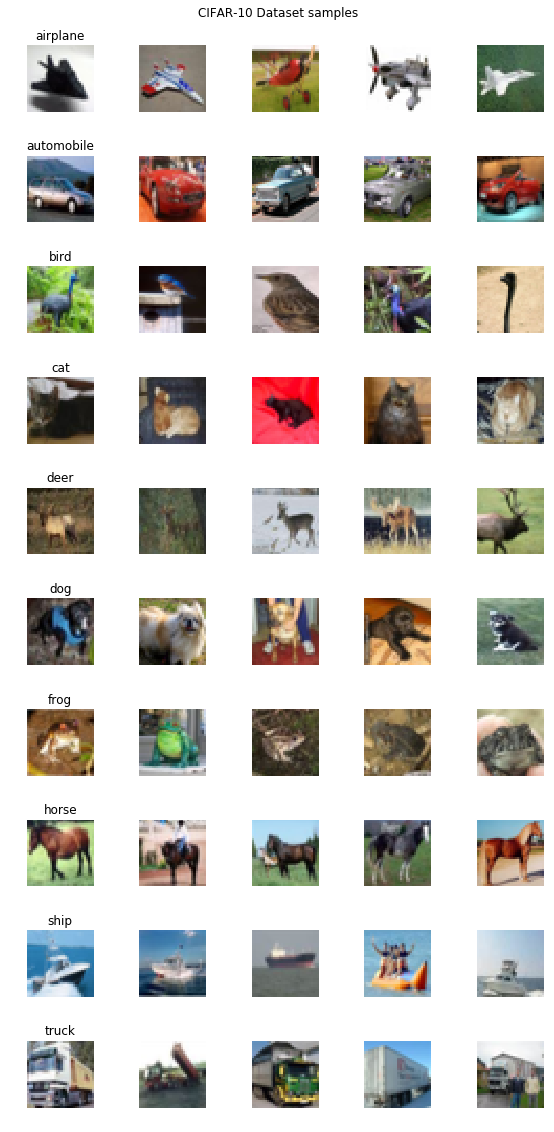

In [4]:
def get_images_by_category(category_idx):
    return x_train[np.where(y_train == category_idx)[0]]

def get_image(category_idx, image_idx):
    return get_images_by_category(category_idx)[image_idx], cifar10_categories[category_idx] if image_idx == 0 else None

grid_of_images(5, len(cifar10_categories), get_image, grid_width=8)
plt.suptitle('CIFAR-10 Dataset samples')
plt.tight_layout(rect=[0, 0, 1, 0.97])

## Common Classifier

In [5]:
def train(train_images, train_labels):
    # build model
    return model

def predict(model, test_images):
    # predict
    return test_labels

## Nearest Neighbour Classifier
property
- accuracy on training set is 100%
- speed: 
$$
distance_speed = width*height*num_trained_samples 
$$
$$
atgmin_speed = num_trained_samples
$$
$$
speed = distance_speed
$$
- libs [FLANN](https://github.com/mariusmuja/flann) - fast library for aproximate NN ([python binding](https://github.com/primetang/pyflann))

In [6]:
class NearestNeighbour:
    def fit(self, X, y):
        """
        train model with example and labels
        """
        # remember all images
        assert len(X.shape) == 4
        assert len(y.shape) == 2
        self.X_trained = X
        self.y_trained = y
        return self

    def predict(self, X):
        """
        Predict labels for items
        """
        
        if len(X.shape) == 3:
            X = np.expand_dims(X, axis=0)
            
        assert len(X.shape) == 4
        
        for instance in X:
            # - manhattan distance (L1 distance)
            distance = np.sum(np.abs(self.X_trained - instance), axis = (1,2,3))
            min_index = np.argmin(distance)
            yield self.y_trained[min_index][0]

In [7]:
nn = NearestNeighbour().fit(x_train, y_train)
%time list(nn.predict(x_test[:10]))

CPU times: user 2.7 s, sys: 1.12 s, total: 3.82 s
Wall time: 3.82 s


[8, 8, 1, 0, 4, 2, 2, 5, 0, 8]

### kNN

big differences to Nearest Neighbour are
- get k-instances the most likely 
- make majority vote

property:
- for k > 1, accuracy on training set is < 100%
- k - hyper parameter
- in comparison to Nearest Neighbour it smoothes boundaries

practice
- never used on images
- terrible performance on test time
- distance metrics on level of whole images can be very unintuitive

In [8]:
class KNearestNeighbour:
    def __init__(self, k=5):
        self.k = k

    def fit(self, X, y):
        """
        train model with example and labels
        """
        # remember all images
        assert len(X.shape) == 4
        assert len(y.shape) == 2
        self.X_trained = X
        self.y_trained = y
        return self

    def predict(self, X):
        """
        Predict labels for items
        
        it will return the most likely class, probability of each class and list of the most likely images
        return:
            category_id, 
            frequency of category,
            distance of image,
            closest images,
        """
        
        if len(X.shape) == 3:
            X = np.expand_dims(X, axis=0)
            
        assert len(X.shape) == 4
        
        res = []
        
        for instance in X:
            # - manhattan distance (L1 distance)
            distance = np.sum(np.abs(self.X_trained - instance), axis = (1,2,3))
            min_indexes = distance.argsort()[:self.k]
            counts = np.bincount(self.y_trained[min_indexes].ravel())
            res.append({
                'category': np.argmax(counts), 
                'freq': counts / counts.sum(), 
                'distance': distance[min_indexes], 
                'images': min_indexes,
            })
            
        return res
    `
    def score(self, x_accuracy, y_accuracy):
        predicted_categories = list(map(lambda el: el['category'], self.predict(x_accuracy)))
        return np.mean(predicted_categories == y_accuracy.flatten())    

In [9]:
# make a modal

knn = KNearestNeighbour().fit(x_train, y_train)

CPU times: user 2.81 s, sys: 910 ms, total: 3.72 s
Wall time: 3.73 s


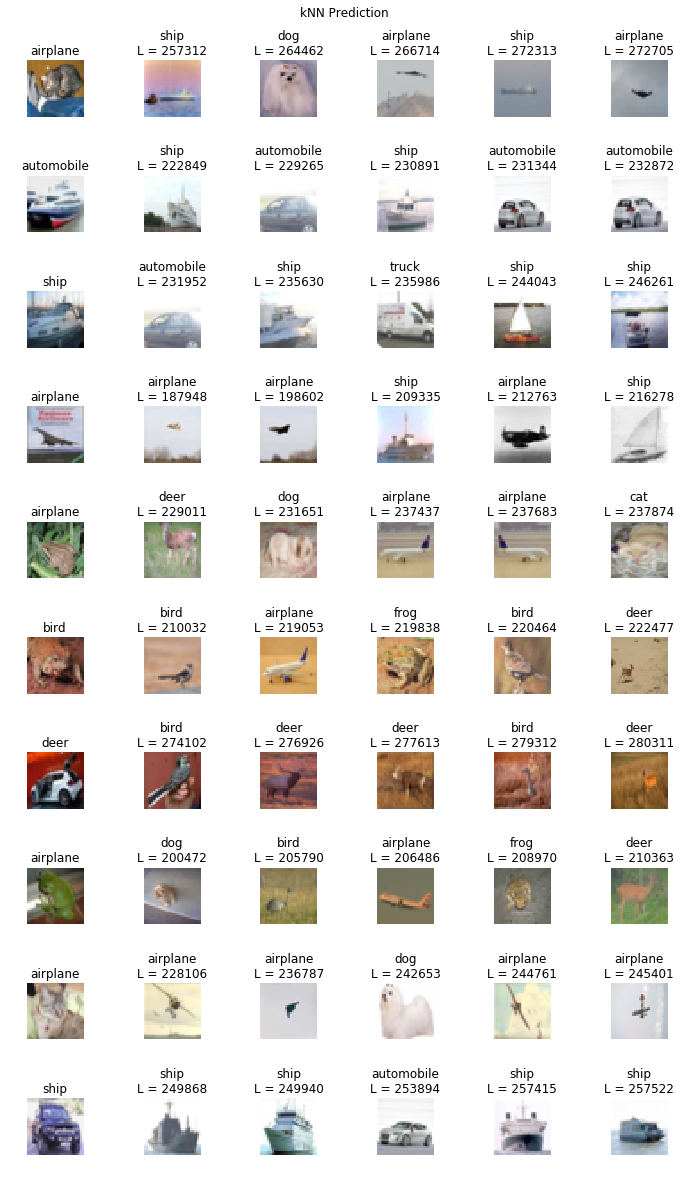

In [10]:
# predict classes of 10 test images of data set.

def build_get_image(test_images, train_categories):
    def get_image(test_idx, sample_idx):
        prediction = predictions[test_idx]
        if sample_idx == 0:
            # show test image
            category_idx = prediction['category']
            return test_images[test_idx], cifar10_categories[category_idx]
        else:
            # show the closest images
            distance = prediction['distance'][sample_idx - 1]
            
            image_idx = prediction['images'][sample_idx - 1]
            category_idx = train_categories[image_idx][0]
            category_title = cifar10_categories[category_idx]
            
            return x_train[image_idx], f'{category_title}\nL = {distance}'
    return get_image

%time predictions = knn.predict(x_test[:10])
grid_of_images(6, 10, build_get_image(x_test, y_train), grid_width=10)
plt.suptitle('kNN Prediction')
plt.tight_layout(rect=[0, 0, 1, 0.97])

In [11]:
## k-nn is too slow so we are checking it accuracy on small chunk of test data

%time accuracy = knn.score(x_test[:50], y_test[:50])
print (f'accuracy {accuracy}')

CPU times: user 13.3 s, sys: 4.92 s, total: 18.2 s
Wall time: 18.3 s
accuracy 0.22


## Tuning hyper parameters

use cross validation on folds and forget about test set until we will ready to make finaly estimation

In [12]:
from sklearn import model_selection

x_train_for_hyper, x_validation, y_train_for_hyper, y_validation = model_selection.train_test_split(
    x_train, y_train, test_size=0.05, random_state=0)

print('shape of chunks', list(map(lambda el: el.shape, [x_train_for_hyper, x_validation, y_train_for_hyper, y_validation])))
# TODO: try cross validation on cifar-10
# - show graphics _accuracy by k_ and animate it

def find_hypter_parameters():
    validation_accuracies = []

    for k in [2, 3, 5, 7, 10, 13, 15, 20, 25, 30, 50]:
        knn = KNearestNeighbour(k=k)
        knn.fit(x_train_for_hyper, y_train_for_hyper)
        score = knn.score(x_validation, y_validation)
        validation_accuracies.append((k, score))
    return validation_accuracies
    
%time validation_accuracies = find_hypter_parameters()
print(f'scores: {validation_accuracies}')

shape of chunks [(47500, 32, 32, 3), (2500, 32, 32, 3), (47500, 1), (2500, 1)]
CPU times: user 2h 11min 57s, sys: 45min 52s, total: 2h 57min 49s
Wall time: 3h 25min 24s
scores: [(2, 0.222), (3, 0.22800000000000001), (5, 0.23080000000000001), (7, 0.24079999999999999), (10, 0.25040000000000001), (13, 0.25280000000000002), (15, 0.24759999999999999), (20, 0.23880000000000001), (25, 0.23319999999999999), (30, 0.23080000000000001), (50, 0.224)]


optimal k = 13.0


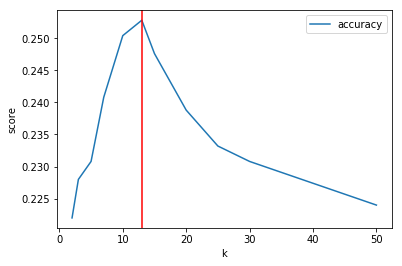

In [13]:
scores = np.array(validation_accuracies)
plt.plot(scores[:,0], scores[:,1], label='accuracy')
plt.xlabel('k')
plt.ylabel('score')
plt.legend();

optimal_k = scores[:,0][np.argmax(scores[:,1])]

plt.axvline(x=optimal_k, color='red')

print(f'optimal k = {optimal_k}')

interesting why do we get $k_{optimal} \approx 13$ here but Andrej got $\approx 5$

### k-nn from scikit-learn
- [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
- [example](http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html)

**TODO:** implement:
- scikit-learn 
- (?) FLANN (https://github.com/mariusmuja/flann and https://github.com/primetang/pyflann)

### Use t-SNE to show CIFAR-10 images embedding in two dimensions
based on k-NN classifier
- http://lvdmaaten.github.io/tsne/
- http://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html#sphx-glr-auto-examples-manifold-plot-lle-digits-py

**TODO:** implement

## Linear Classifier

$$
f(x, W) = Wx + b
$$
where $x$ - image, $W$ - weights, $b$ - bieses, result is class scores

- another way of thinking about Linear classifier is _Nearest Neighbor_. Where instead of having many images we only have single template image for each category and the (negative) inner product as the distance instead of the L1 or L2 distance.
- preprocess image data `[0 ... 255] -> [-1 ... 1]`

### ... to be continue [./lec3-linear-classification-optimization.ipynb](./lec3-linear-classification-optimization.ipynb)

In [14]:
# TODO: visualize W
# 1) take each row of W
# 2) reshape it back to the image (w x h) - template or prototype 
# 3) animate template